<a href="https://colab.research.google.com/github/jpcampos04/Sprint5_project/blob/main/16c3a364_a21b_40aa_9e4d_40c2f097c18e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El proposito del proyecto es analizar y comparar el patron de consumo de una muestra de usuarios con dos planes tarifarios diferentes. Conocer si los planes van de acuerdo a los habitos de consumo de estos dos diferentes grupos. Por último saber que plan tarifario le genera mas ganancias a la compañia y que plan le genera más ganancias a la compañia por usuario.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
df_ml_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_ml_users = pd.read_csv('/datasets/megaline_users.csv')
df_ml_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_ml_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_ml_internet = pd.read_csv('/datasets/megaline_internet.csv')

## Preparar los datos

In [ ]:
print('La información del DataFrame es:')
print()
df_ml_plans.info()
print()
print('Las columnas del DataFrame son:')
print(df_ml_plans.columns)
print()
print('El tamaño del DataFrame es:')
print(df_ml_plans.shape)
print()
print('Los primeros datos del DataFrame son:')
print(df_ml_plans.head())
print()
print('El DataFrame tiene los siguientes valores ausentes:')
print(df_ml_plans.isna().sum())
print()
print('El DataFrame tiene los siguientes duplicados:')
print(df_ml_plans.duplicated().sum())

La información del DataFrame es:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

Las columnas del DataFrame son:
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

El tamaño del DataFrame es:
(2, 8)

Los primeros dat

El DataFrame Plans contiene las tarifas de los dos diferentes planes y los costos adicionales en los que el cliente incurre si sobrepasa las cantidades establecidas dentro de su plan. Se observa que los datos tienen los tipos de datos correctos, el formato en que se nombran las columnas es correcto, el tamaño del DataFrame es de 2 filas x 8 columnas, no contiene valores ausentes y no contiene valores duplicados.

In [ ]:
print('La información del DataFrame es:')
print()
df_ml_users.info()
print()
print('Las columnas del DataFrame son:')
print(df_ml_users.columns)
print()
print('El tamaño del DataFrame es:')
print(df_ml_users.shape)
print()
print('Los primeros datos del DataFrame son:')
print(df_ml_users.head())
print()
print('El DataFrame tiene los siguientes valores ausentes:')
print(df_ml_users.isna().sum())
print()
print('El DataFrame tiene los siguientes duplicados:')
print(df_ml_users.duplicated().sum())

La información del DataFrame es:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Las columnas del DataFrame son:
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

El tamaño del DataFrame es:
(500, 8)

Los primeros datos del DataFrame son:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mi

El DataFrame Users contiene información referente al registro de los usuarios, se aprecia que la mayoría de los tipos de datos son correctos con excepción de la fecha de registro que habrá que cambiar más adelante, el formato en que se nombran las columnas es correcto, el tamaño del DataFrame es de 500 filas x 8 columnas, se observa que la columna churn_date posee valores ausentes que habrá que rellenar más adelante y no contiene valores duplicados. Será necesario filtrar los usuarios de acuerdo a su plan.

In [ ]:
print('La información del DataFrame es:')
print()
df_ml_calls.info()
print()
print('Las columnas del DataFrame son:')
print(df_ml_calls.columns)
print()
print('El tamaño del DataFrame es:')
print(df_ml_calls.shape)
print()
print('Los primeros datos del DataFrame son:')
print(df_ml_calls.head())
print()
print('El DataFrame tiene los siguientes valores ausentes:')
print(df_ml_calls.isna().sum())
print()
print('El DataFrame tiene los siguientes duplicados:')
print(df_ml_calls.duplicated().sum())

La información del DataFrame es:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Las columnas del DataFrame son:
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

El tamaño del DataFrame es:
(137735, 4)

Los primeros datos del DataFrame son:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

El DataFrame tiene los siguientes valores ausentes:
id           0
user_id      0
call_date    0
duration     

El DataFrame Calls contiene información referente a las llamadas de los usuarios, se aprecia que la mayoría de los tipos de datos son correctos con excepción de la fecha de llamada que habrá que cambiar más adelante, a su vez será necesario redondear los segundos a minutos, el formato en que se nombran
las columnas es correcto, el tamaño del DataFrame es de 137735 filas x 4 columnas, no posee valores ausentes y no contiene valores duplicados.

In [ ]:
print('La información del DataFrame es:')
print()
df_ml_messages.info()
print()
print('Las columnas del DataFrame son:')
print(df_ml_messages.columns)
print()
print('El tamaño del DataFrame es:')
print(df_ml_messages.shape)
print()
print('Los primeros datos del DataFrame son:')
print(df_ml_messages.head())
print()
print('El DataFrame tiene los siguientes valores ausentes:')
print(df_ml_messages.isna().sum())
print()
print('El DataFrame tiene los siguientes duplicados:')
print(df_ml_messages.duplicated().sum())

La información del DataFrame es:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Las columnas del DataFrame son:
Index(['id', 'user_id', 'message_date'], dtype='object')

El tamaño del DataFrame es:
(76051, 3)

Los primeros datos del DataFrame son:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

El DataFrame tiene los siguientes valores ausentes:
id              0
user_id         0
message_date    0
dtype: int64

El DataFrame tiene los siguientes duplicados:
0


El DataFrame Messages contiene información referente a los mensajes SMS, se aprecia que la mayoría de los tipos de datos son correctos con excepción de la fecha de mensaje que habrá que cambiar más adelante, el formato en que se nombran las columnas es correcto, el tamaño del DataFrame es de 76051 filas x 3 columnas, no posee valores ausentes y no contiene valores duplicados.

In [ ]:
print('La información del DataFrame es:')
print()
df_ml_internet.info()
print()
print('Las columnas del DataFrame son:')
print(df_ml_internet.columns)
print()
print('El tamaño del DataFrame es:')
print(df_ml_internet.shape)
print()
print('Los primeros datos del DataFrame son:')
print(df_ml_internet.head())
print()
print('El DataFrame tiene los siguientes valores ausentes:')
print(df_ml_internet.isna().sum())
print()
print('El DataFrame tiene los siguientes duplicados:')
print(df_ml_internet.duplicated().sum())

La información del DataFrame es:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Las columnas del DataFrame son:
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

El tamaño del DataFrame es:
(104825, 4)

Los primeros datos del DataFrame son:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

El DataFrame tiene los siguientes valores ausentes:
id              0
user_id         0
se

El DataFrame Internet contiene información referente al volumen de datos utilizados por los usuarios, se aprecia que la mayoría de los tipos de datos son correctos con excepción de la fecha de sesión que habrá que cambiar más adelante, el formato en que se nombran las columnas es correcto, el tamaño del DataFrame es de 104825 filas x 4 columnas, no posee valores ausentes y no contiene valores duplicados.

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_ml_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [ ]:
# Imprime una muestra de los datos para las tarifas
print(df_ml_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Corregir datos

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
df_plan_surf = df_ml_plans[df_ml_plans['plan_name'] == 'surf']
print(df_plan_surf)
df_plan_ultimate = df_ml_plans[df_ml_plans['plan_name'] == 'ultimate']
print(df_plan_ultimate)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_ml_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios
print(df_ml_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Es necesario cambiar el tipo de la fecha de registro y sustituir los valores ausentes.

### Corregir los datos

In [ ]:
#Cambia el tipo de dato de object a datetime
df_ml_users['reg_date'] = pd.to_datetime(df_ml_users['reg_date'], format='%Y-%m-%dT')
print()
#Sustituye los valores ausentes
df_ml_users['churn_date'] = df_ml_users['churn_date'].fillna(1)
df_ml_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [ ]:
#Extrae el area
df_ml_users['area'] = df_ml_users['city'].str.extract(r'([A-Z]{2} MSA)$')
df_users_area = df_ml_users[['user_id','area']]
print(df_users_area)
print()
print('La cantidad de usuarios que se registró en cada plan son:')
print()
#Agrupa el DataFrame a partir de la columna plan, muestra la columna user_id y cuenta los valores
print(df_ml_users.groupby('plan')['user_id'].count())
#Divide el DataFrame dependiendo del plan que tenga cada usuario
df_users_surf = df_ml_users[df_ml_users['plan'] == 'surf']
df_users_ultimate = df_ml_users[df_ml_users['plan'] == 'ultimate']
print()
print('El promedio de edad de los usuarios es de:')
print(df_ml_users['age'].mean(),'años.')
print()
print('La cantidad de usuarios que continuaban usando el servicio a la fecha de obtención de la información es:')
print(df_ml_users[df_ml_users['churn_date'] == 1]['user_id'].count(), 'usuarios.')

     user_id    area
0       1000  GA MSA
1       1001  WA MSA
2       1002  NV MSA
3       1003  OK MSA
4       1004  WA MSA
..       ...     ...
495     1495  PA MSA
496     1496  LA MSA
497     1497  CA MSA
498     1498  PA MSA
499     1499  FL MSA

[500 rows x 2 columns]

La cantidad de usuarios que se registró en cada plan son:

plan
surf        339
ultimate    161
Name: user_id, dtype: int64

El promedio de edad de los usuarios es de:
45.486 años.

La cantidad de usuarios que continuaban usando el servicio a la fecha de obtención de la información es:
466 usuarios.


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_ml_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas
print(df_ml_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Es necesario cambiar el tipo de la fecha de llamadas. Un usuario puede tener registradas multiples llamadas por lo que habra que sumar el total de minutos por usuario.

### Corregir los datos

In [ ]:
#Cambia el tipo de dato de object a datetime
df_ml_calls['call_date'] = pd.to_datetime(df_ml_calls['call_date'], format='%Y-%m-%dT')

#Redondea los segundos a minutos
df_ml_calls['duration'] = np.ceil(df_ml_calls['duration'])
#Cambia el tipo de dato de float a entero
df_ml_calls['duration'] = df_ml_calls['duration'].astype(int)
print(df_ml_calls.head())
df_ml_calls.info()

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27         9
1  1000_145     1000 2018-12-27        14
2  1000_247     1000 2018-12-27        15
3  1000_309     1000 2018-12-28         6
4  1000_380     1000 2018-12-30         5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [ ]:
#Extrae el año y mes de la fecha de llamada
df_ml_calls['year_month'] = df_ml_calls['call_date'].dt.to_period('M')
#Duración promedio por llamada
print('La duración promedio por llamada es de:')
print(df_ml_calls['duration'].mean(), 'minutos.')
print()
#Promedio de llamadas por usuario
print('El promedio de llamadas por usuario es de:')
print(df_ml_calls.groupby('user_id')['id'].count().mean(), 'llamadas.')



La duración promedio por llamada es de:
7.146672958942897 minutos.

El promedio de llamadas por usuario es de:
286.35135135135135 llamadas.


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_ml_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes
print(df_ml_messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


### Corregir los datos

In [ ]:
#Cambia el tipo de dato de object a datetime
df_ml_messages['message_date'] = pd.to_datetime(df_ml_messages['message_date'], format='%Y-%m-%dT')
print()
df_ml_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [ ]:
#Extrae el año y mes de la fecha del mensaje
df_ml_messages['year_month'] = df_ml_messages['message_date'].dt.to_period('M')
#Promedio de mensajes por usuario
print('El promedio de mensajes por usuario es de:')
print(df_ml_messages.groupby('user_id')['id'].count().mean(), 'mensajes.')


El promedio de mensajes por usuario es de:
189.181592039801 mensajes.


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_ml_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
print(df_ml_internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
#Cambia el tipo de dato de object a datetime
df_ml_internet['session_date'] = pd.to_datetime(df_ml_internet['session_date'], format='%Y-%m-%dT')
print()
df_ml_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [ ]:
#Extrae el año y mes de la fecha del mensaje
df_ml_internet['year_month'] = df_ml_internet['session_date'].dt.to_period('M')
#Promedio de datos por usuario
print('El promedio de datos por usuario es de:')
print(df_ml_internet.groupby('user_id')['mb_used'].count().mean(), 'mb.')

El promedio de datos por usuario es de:
214.36605316973416 mb.


## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plan_surf)
print()
print(df_plan_ultimate)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario


In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = df_ml_calls.groupby(['user_id', 'year_month',]).size().reset_index(name='number_calls')
print(calls_per_user_month)
print(calls_per_user_month.shape)

      user_id year_month  number_calls
0        1000    2018-12            16
1        1001    2018-08            27
2        1001    2018-09            49
3        1001    2018-10            65
4        1001    2018-11            64
...       ...        ...           ...
2253     1498    2018-12            39
2254     1499    2018-09            41
2255     1499    2018-10            53
2256     1499    2018-11            45
2257     1499    2018-12            65

[2258 rows x 3 columns]
(2258, 3)


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = df_ml_calls.groupby(['user_id', 'year_month']).size().reset_index(name='number_minutes')
print(minutes_per_user_month)
print(minutes_per_user_month.shape)

      user_id year_month  number_minutes
0        1000    2018-12              16
1        1001    2018-08              27
2        1001    2018-09              49
3        1001    2018-10              65
4        1001    2018-11              64
...       ...        ...             ...
2253     1498    2018-12              39
2254     1499    2018-09              41
2255     1499    2018-10              53
2256     1499    2018-11              45
2257     1499    2018-12              65

[2258 rows x 3 columns]
(2258, 3)


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = df_ml_messages.groupby(['user_id', 'year_month']).size().reset_index(name='number_messages')
print(messages_per_user_month)
print(messages_per_user_month.shape)

      user_id year_month  number_messages
0        1000    2018-12               11
1        1001    2018-08               30
2        1001    2018-09               44
3        1001    2018-10               53
4        1001    2018-11               36
...       ...        ...              ...
1801     1496    2018-09               21
1802     1496    2018-10               18
1803     1496    2018-11               13
1804     1496    2018-12               11
1805     1497    2018-12               50

[1806 rows x 3 columns]
(1806, 3)


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_month = df_ml_internet.groupby(['user_id', 'year_month']).size().reset_index(name='number_gb')
print(internet_per_user_month)
print(internet_per_user_month.shape)

      user_id year_month  number_gb
0        1000    2018-12          5
1        1001    2018-08         25
2        1001    2018-09         53
3        1001    2018-10         56
4        1001    2018-11         51
...       ...        ...        ...
2272     1498    2018-12         65
2273     1499    2018-09         45
2274     1499    2018-10         61
2275     1499    2018-11         49
2276     1499    2018-12         65

[2277 rows x 3 columns]
(2277, 3)


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_consumption = calls_per_user_month.merge(minutes_per_user_month, on=['user_id', 'year_month']).merge(messages_per_user_month, on=['user_id', 'year_month']).merge(internet_per_user_month, on=['user_id', 'year_month'])

print(df_consumption)

      user_id year_month  number_calls  number_minutes  number_messages  \
0        1000    2018-12            16              16               11   
1        1001    2018-08            27              27               30   
2        1001    2018-09            49              49               44   
3        1001    2018-10            65              65               53   
4        1001    2018-11            64              64               36   
...       ...        ...           ...             ...              ...   
1754     1496    2018-09            52              52               21   
1755     1496    2018-10            46              46               18   
1756     1496    2018-11            39              39               13   
1757     1496    2018-12            40              40               11   
1758     1497    2018-12            54              54               50   

      number_gb  
0             5  
1            25  
2            53  
3            56  
4        

In [ ]:
# Añade la información de la tarifa
df_consumption = df_consumption.merge(df_ml_users[['user_id','plan']], on='user_id', how='left')
print(df_consumption)

      user_id year_month  number_calls  number_minutes  number_messages  \
0        1000    2018-12            16              16               11   
1        1001    2018-08            27              27               30   
2        1001    2018-09            49              49               44   
3        1001    2018-10            65              65               53   
4        1001    2018-11            64              64               36   
...       ...        ...           ...             ...              ...   
1754     1496    2018-09            52              52               21   
1755     1496    2018-10            46              46               18   
1756     1496    2018-11            39              39               13   
1757     1496    2018-12            40              40               11   
1758     1497    2018-12            54              54               50   

      number_gb      plan  
0             5  ultimate  
1            25      surf  
2            53

In [ ]:
# Fusiona los datos de consumo con las tarifas de acuerdo con el plan de cada usuario
df_consumption_merge = df_consumption.merge(df_ml_plans, left_on='plan', right_on= 'plan_name', how='left')
print(df_consumption_merge.head())

   user_id year_month  number_calls  number_minutes  number_messages  \
0     1000    2018-12            16              16               11   
1     1001    2018-08            27              27               30   
2     1001    2018-09            49              49               44   
3     1001    2018-10            65              65               53   
4     1001    2018-11            64              64               36   

   number_gb      plan  messages_included  mb_per_month_included  \
0          5  ultimate               1000                  30720   
1         25      surf                 50                  15360   
2         53      surf                 50                  15360   
3         56      surf                 50                  15360   
4         51      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500 

In [ ]:
# Calcula el ingreso mensual para cada usuario
df_consumption_merge['extra_minutes'] = (df_consumption_merge['number_minutes'] - df_consumption_merge['minutes_included']).clip(lower=0)
df_consumption_merge['extra_messages'] = (df_consumption_merge['number_messages'] - df_consumption_merge['messages_included']).clip(lower=0)
#Para poder calcular los datos convierte gb a mb, obtiene la diferencia del plan y el consumo; regresa el resultado a gb
df_consumption_merge['extra_gb'] = (((df_consumption_merge['number_gb'] * 1000) - df_consumption_merge['mb_per_month_included'])/1000).clip(lower=0)
#Redondea el consumo de datos
df_consumption_merge['extra_gb'] = np.ceil(df_consumption_merge['extra_gb'])

df_consumption_merge['extra_cost'] = (df_consumption_merge['extra_minutes'] + df_consumption_merge['extra_messages'] + df_consumption_merge['extra_gb'])
df_consumption_merge['total_income'] = df_consumption_merge['usd_monthly_pay'] + df_consumption_merge['extra_cost']
print(df_consumption_merge.head())

   user_id year_month  number_calls  number_minutes  number_messages  \
0     1000    2018-12            16              16               11   
1     1001    2018-08            27              27               30   
2     1001    2018-09            49              49               44   
3     1001    2018-10            65              65               53   
4     1001    2018-11            64              64               36   

   number_gb      plan  messages_included  mb_per_month_included  \
0          5  ultimate               1000                  30720   
1         25      surf                 50                  15360   
2         53      surf                 50                  15360   
3         56      surf                 50                  15360   
4         51      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Muy bien estructurado! Has realizado una exploración de datos detallada y bien organizada, asegurando la limpieza y corrección de los datos antes del análisis. La fusión de información de consumo con las tarifas está bien implementada y permitirá realizar un análisis sólido del impacto financiero de cada plan tarifario.  
</div>

## Estudia el comportamiento de usuario

In [ ]:
print('El ingreso promedio por usuario según su plan es el siguiente:')
print(df_consumption_merge.groupby(['plan'])['total_income'].mean())

El ingreso promedio por usuario según su plan es el siguiente:
plan
surf        59.962712
ultimate    88.271157
Name: total_income, dtype: float64


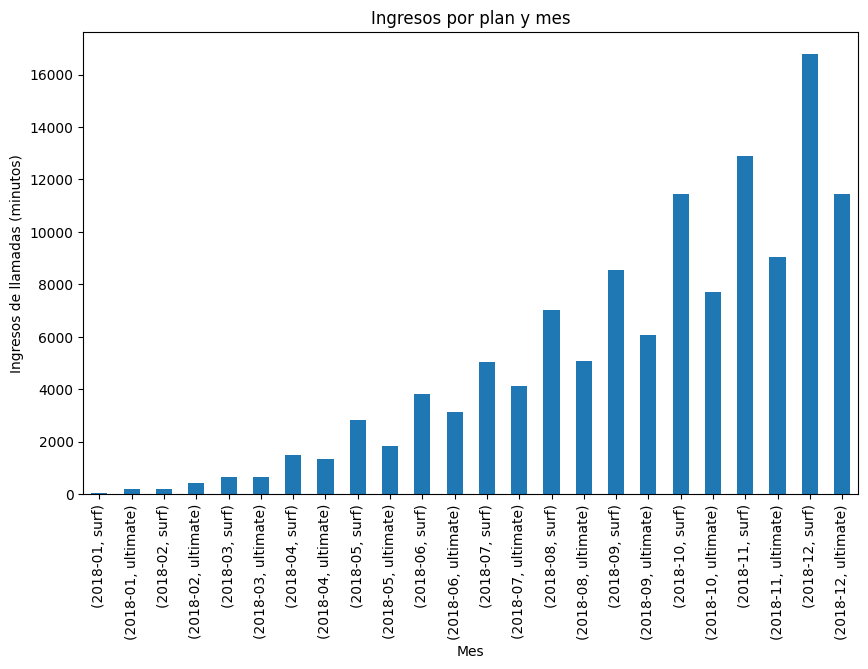

In [ ]:
# Compara los ingresos por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
from matplotlib import pyplot as plt

#Agrupa el Dataframe a partir de la fecha y el plan de los usuarios y suma los ingresos
income_per_plan_month = df_consumption_merge.groupby(['year_month', 'plan'])['total_income'].sum()

#Gráfica
income_per_plan_month.plot(figsize=(10,6), kind='bar', title='Ingresos por plan y mes', xlabel='Mes', ylabel='Ingresos de llamadas (minutos)')

plt.show()

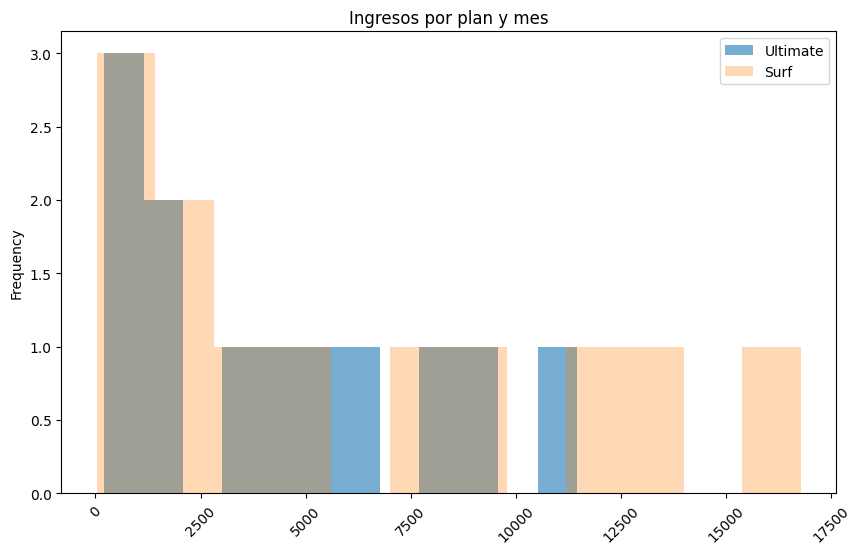

In [ ]:
# Compara el ingreso mensuales de los usuarios de cada plan. Traza un histograma.
income_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['year_month', 'plan'])['total_income'].sum()
income_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['year_month', 'plan'])['total_income'].sum()

#Gráfica
income_ultimate.plot(figsize=(10,6), kind='hist', bins=12, title='Ingresos por plan y mes', alpha=0.6, rot=45)
income_surf.plot(figsize=(10,6), kind='hist', bins=12, title='Ingresos por plan y mes', alpha=0.3, rot=45)

plt.legend(['Ultimate', 'Surf'])
plt.show()

In [ ]:
# Calcula la media y la varianza de los ingresos mensuales
#Filtra de acuerdo al plan y agrupa por ingresos mensuales
income_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['year_month'])['total_income'].sum()
income_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['year_month'])['total_income'].sum()
print(income_ultimate)
print()
print(income_surf)
print()
#Calcula la media
print('La media del plan Ultimate es igual a', income_ultimate.median())
print('La varianza del plan Ultimate es igual a', np.var(income_ultimate))
print()
print('La media del plan Surf es igual a', income_surf.median())
print('La media del plan Surf es igual a', np.var(income_ultimate))

year_month
2018-01      210.0
2018-02      431.0
2018-03      667.0
2018-04     1323.0
2018-05     1834.0
2018-06     3136.0
2018-07     4135.0
2018-08     5091.0
2018-09     6074.0
2018-10     7712.0
2018-11     9042.0
2018-12    11454.0
Freq: M, Name: total_income, dtype: float64

year_month
2018-01       27.0
2018-02      186.0
2018-03      661.0
2018-04     1489.0
2018-05     2816.0
2018-06     3826.0
2018-07     5047.0
2018-08     7018.0
2018-09     8552.0
2018-10    11446.0
2018-11    12908.0
2018-12    16780.0
Freq: M, Name: total_income, dtype: float64

La media del plan Ultimate es igual a 3635.5
La varianza del plan Ultimate es igual a 12523537.243055554

La media del plan Surf es igual a 4436.5
La media del plan Surf es igual a 12523537.243055554


In [ ]:
print(income_ultimate.describe())
print()
print(income_surf.describe())

count       12.000000
mean      4259.083333
std       3696.219775
min        210.000000
25%       1159.000000
50%       3635.500000
75%       6483.500000
max      11454.000000
Name: total_income, dtype: float64

count       12.000000
mean      5896.333333
std       5519.498945
min         27.000000
25%       1282.000000
50%       4436.500000
75%       9275.500000
max      16780.000000
Name: total_income, dtype: float64


De acuerdo a las gráficas se puede observar que el plan que más genera ingresos es el plan Surf, tanto por volumen de ususarios registrados así como por costos extras no incluidos en su plan. En general aquellos con el plan Ultimate registran muy pocos costos extras a comparación de los del plan Surf que en su mayoría exceden el límte de su plan.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Gran análisis del comportamiento de los usuarios! Has utilizado gráficos efectivos y cálculos estadísticos clave para comparar los ingresos por plan. La conclusión sobre el plan **Surf** generando más ingresos debido a los costos adicionales es acertada y bien fundamentada en los datos.  
</div>

### Llamadas

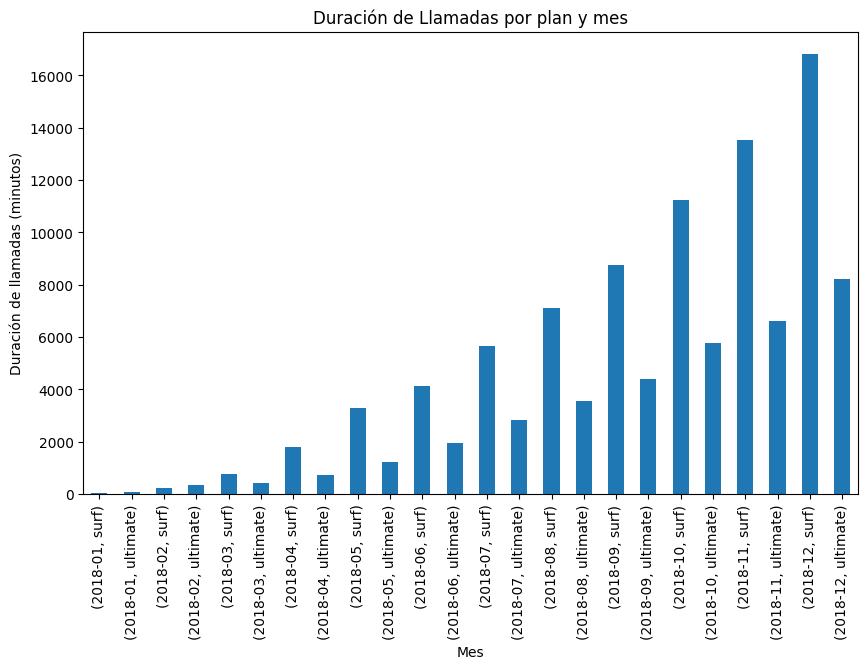

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
from matplotlib import pyplot as plt

#Agrupa el Dataframe a partir de la fecha y el plan de los usuarios y suma el número de minutos
minutes_per_plan_month = df_consumption_merge.groupby(['year_month', 'plan'])['number_minutes'].sum()

#Gráfica
minutes_per_plan_month.plot(figsize=(10,6), kind='bar', title='Duración de Llamadas por plan y mes', xlabel='Mes', ylabel='Duración de llamadas (minutos)')

plt.show()

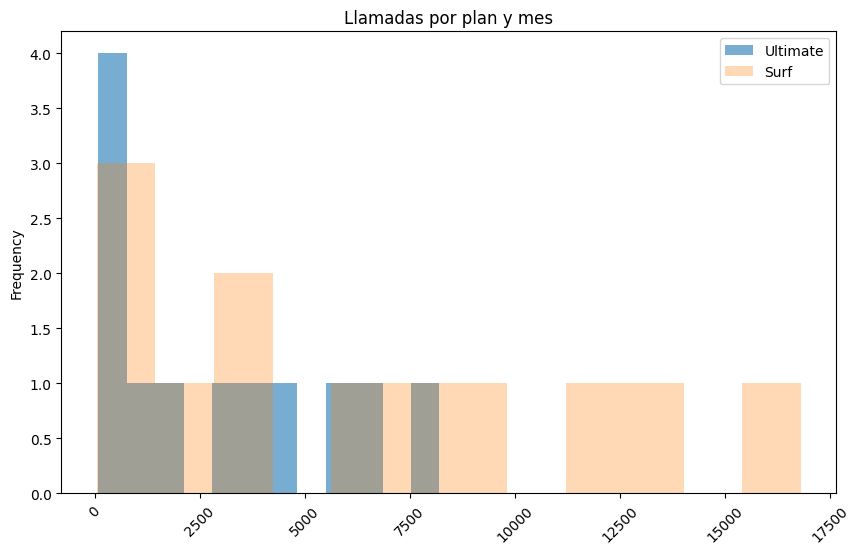

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['year_month', 'plan'])['number_minutes'].sum()
minutes_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['year_month', 'plan'])['number_minutes'].sum()

#Gráfica
minutes_ultimate.plot(figsize=(10,6), kind='hist', bins=12, title='Llamadas por plan y mes', alpha=0.6, rot=45)
minutes_surf.plot(figsize=(10,6), kind='hist', bins=12, title='Llamadas por plan y mes', alpha=0.3, rot=45)

plt.legend(['Ultimate', 'Surf'])
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Filtra de acuerdo al plan y agrupa por minutos
minutes_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['user_id','number_minutes'])['number_minutes'].sum()
minutes_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['user_id','number_minutes'])['number_minutes'].sum()
#print(minutes_ultimate.head())
#print()
#print(minutes_surf.head())
#print()
#Calcula la media
print('La media del plan Ultimate es igual a', minutes_ultimate.median())
print('La varianza del plan Ultimate es igual a', np.var(minutes_ultimate))
print()
print('La media del plan Surf es igual a', minutes_surf.median())
print('La media del plan Surf es igual a', np.var(minutes_ultimate))

La media del plan Ultimate es igual a 64.0
La varianza del plan Ultimate es igual a 1694.3790815236741

La media del plan Surf es igual a 63.0
La media del plan Surf es igual a 1694.3790815236741


In [ ]:
print(minutes_ultimate.describe())
print()
print(minutes_surf.describe())

count    530.000000
mean      68.045283
std       41.201724
min        2.000000
25%       39.000000
50%       64.000000
75%       87.000000
max      336.000000
Name: number_minutes, dtype: float64

count    1110.000000
mean       66.118919
std        38.988199
min         2.000000
25%        41.000000
50%        63.000000
75%        84.000000
max       328.000000
Name: number_minutes, dtype: float64


Respecto a las llamadas los usuarios de ambos planes se mantienen dentro de su plan y su comportamiento en las llamadas es muy similar.

<AxesSubplot:xlabel='number_minutes'>

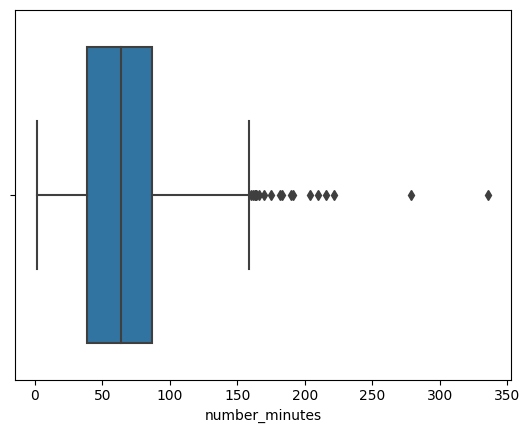

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns

sns.boxplot(minutes_ultimate)

<AxesSubplot:xlabel='number_minutes'>

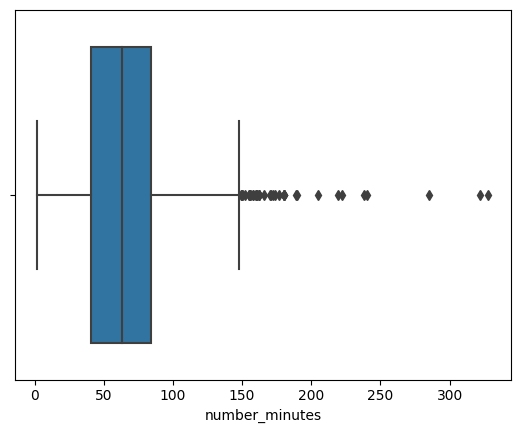

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(minutes_surf)

Los usuarios del plan ultimate no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 39 y 87 minutos.

Los usuarios del plan surf no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre 41 y 84 minutos.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Bien hecho! Has utilizado gráficos adecuados para comparar la duración de llamadas entre los planes y realizar un análisis detallado. La observación de que los usuarios se mantienen dentro de los límites de sus planes y presentan un comportamiento similar en llamadas está bien fundamentada en los datos.  
</div>

### Mensajes

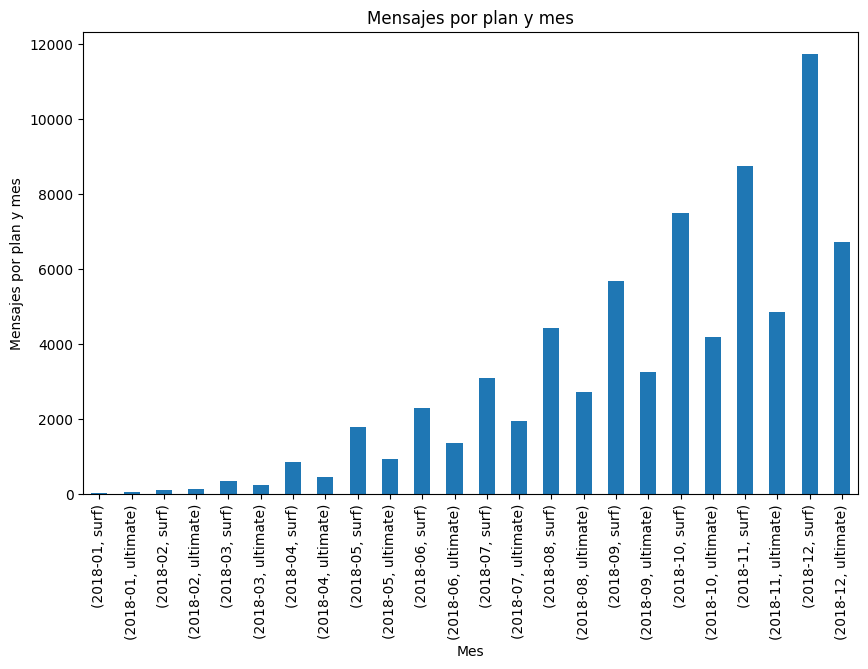

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Agrupa el Dataframe a partir de la fecha y el plan de los usuarios y suma el número de mensajes
messages_per_plan_month = df_consumption_merge.groupby(['year_month', 'plan'])['number_messages'].sum()

#Gráfica
messages_per_plan_month.plot(figsize=(10,6), kind='bar', title='Mensajes por plan y mes', xlabel='Mes', ylabel='Mensajes por plan y mes')

plt.show()

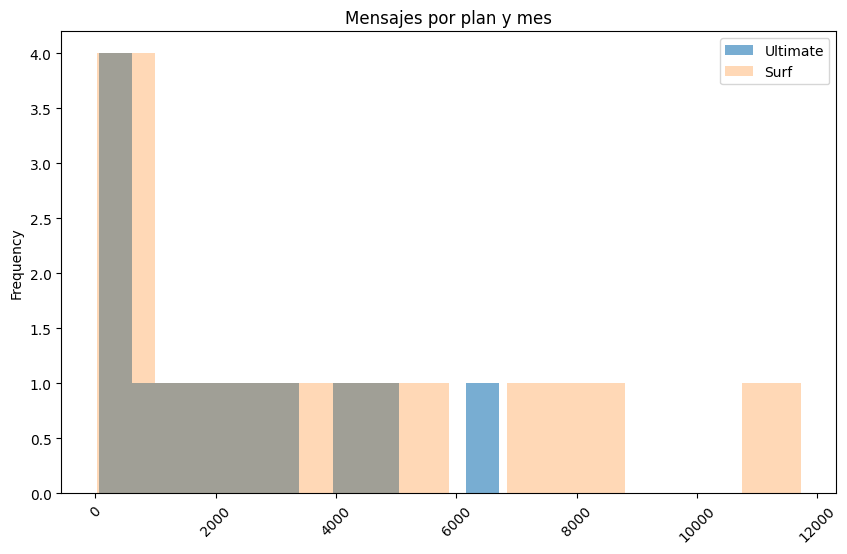

In [ ]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
messages_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['year_month', 'plan'])['number_messages'].sum()
messages_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['year_month', 'plan'])['number_messages'].sum()

#Gráfica
messages_ultimate.plot(figsize=(10,6), kind='hist', bins=12, title='Mensajes por plan y mes', alpha=0.6, rot=45)
messages_surf.plot(figsize=(10,6), kind='hist', bins=12, title='Mensajes por plan y mes', alpha=0.3, rot=45)

plt.legend(['Ultimate', 'Surf'])
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de mensajes.
#Filtra de acuerdo al plan y agrupa por mensajes
messages_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['user_id','number_messages'])['number_messages'].sum()
messages_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['user_id','number_messages'])['number_messages'].sum()
#print(messages_ultimate.head())
#print()
#print(messages_surf.head())
#print()
#Calcula la media
print('La media del plan Ultimate es igual a', messages_ultimate.median())
print('La varianza del plan Ultimate es igual a', np.var(messages_ultimate))
print()
print('La media del plan Surf es igual a', messages_surf.median())
print('La media del plan Surf es igual a', np.var(messages_ultimate))

La media del plan Ultimate es igual a 44.5
La varianza del plan Ultimate es igual a 1345.2549519401923

La media del plan Surf es igual a 35.0
La media del plan Surf es igual a 1345.2549519401923


In [ ]:
print(messages_ultimate.describe())
print()
print(messages_surf.describe())

count    530.000000
mean      50.750943
std       36.712368
min        1.000000
25%       23.250000
50%       44.500000
75%       70.000000
max      298.000000
Name: number_messages, dtype: float64

count    1041.000000
mean       44.762728
std        37.333585
min         1.000000
25%        19.000000
50%        35.000000
75%        61.000000
max       266.000000
Name: number_messages, dtype: float64


Respecto a los mensajes los usuarios del plan ultimate no sobrepasan el límite de mensajes de su plan, mientras que los usuarios del plan surf poco mas del 25% de la muestra sobrepasa los mensajes incluidos en su plan.

<AxesSubplot:xlabel='number_messages'>

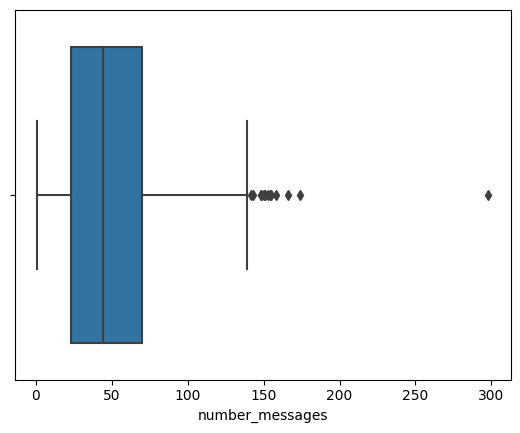

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de mensajes
import seaborn as sns

sns.boxplot(messages_ultimate)

<AxesSubplot:xlabel='number_messages'>

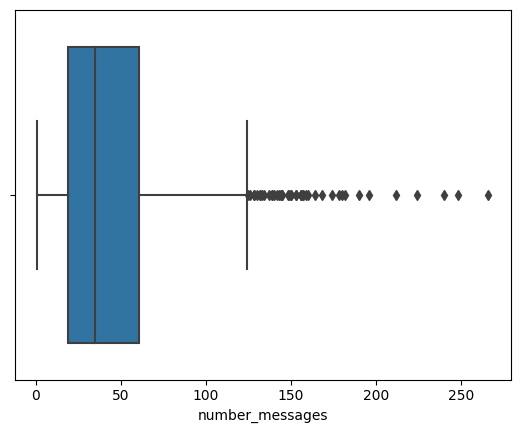

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de mensajes
import seaborn as sns

sns.boxplot(messages_surf)

Los usuarios del plan ultimate no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 23 y 70 mensajes.

Los usuarios del plan surf poco más del 25% de la muestra excede el límte de su plan y el 50% de la muestra ocupa entre 19 y 61 mensajes.

Por lo tanto comparando ambos planes los usuarios del plan ultimate ocupa más mensajes que los usuarios del surf ultimate.

### Internet

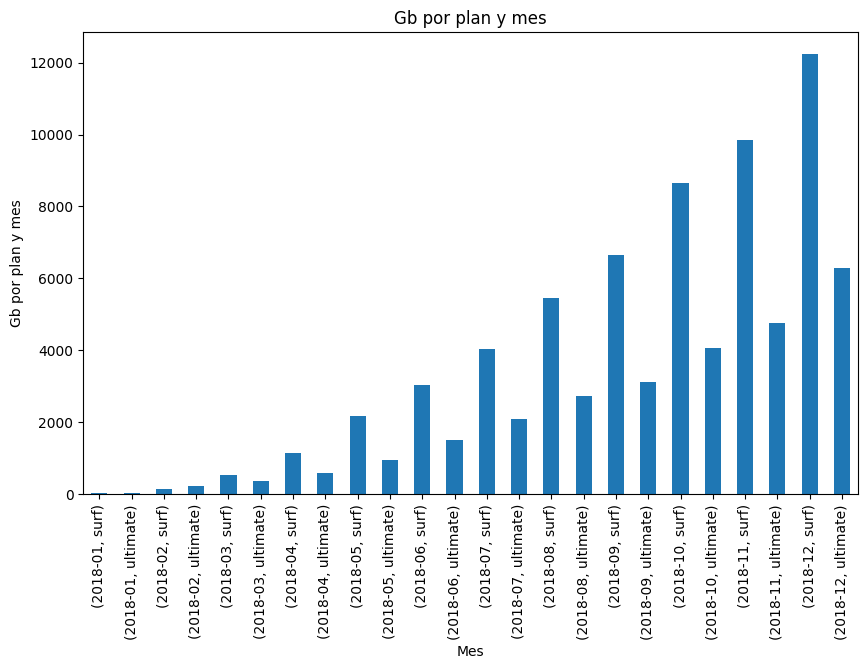

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

#Agrupa el Dataframe a partir de la fecha y el plan de los usuarios y suma el número de datos
internet_per_plan_month = df_consumption_merge.groupby(['year_month', 'plan'])['number_gb'].sum()

#Gráfica
internet_per_plan_month.plot(figsize=(10,6), kind='bar', title='Gb por plan y mes', xlabel='Mes', ylabel='Gb por plan y mes')

plt.show()


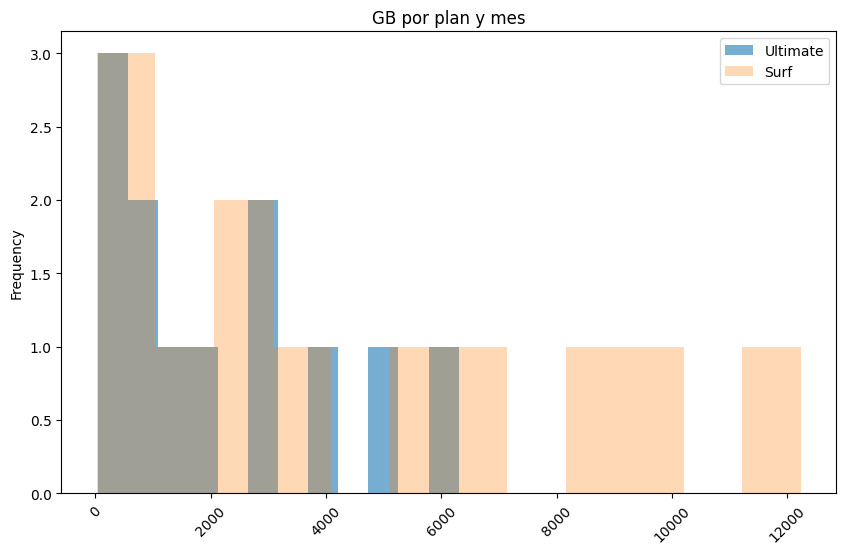

In [ ]:
# Compara el número de datos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
internet_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['year_month', 'plan'])['number_gb'].sum()
internet_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['year_month', 'plan'])['number_gb'].sum()

#Gráfica
internet_ultimate.plot(figsize=(10,6), kind='hist', bins=12, title='GB por plan y mes', alpha=0.6, rot=45)
internet_surf.plot(figsize=(10,6), kind='hist', bins=12, title='GB por plan y mes', alpha=0.3, rot=45)

plt.legend(['Ultimate', 'Surf'])
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de gb.
#Filtra de acuerdo al plan y agrupa por gb
internet_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate'].groupby(['user_id','number_gb'])['number_gb'].sum()
internet_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf'].groupby(['user_id','number_gb'])['number_gb'].sum()
#print(internet_ultimate.head())
#print()
#print(internet_surf.head())
#print()
#Calcula la media
print('La media del plan Ultimate es igual a', internet_ultimate.median())
print('La varianza del plan Ultimate es igual a', np.var(internet_ultimate))
print()
print('La media del plan Surf es igual a', internet_surf.median())
print('La media del plan Surf es igual a', np.var(internet_ultimate))

La media del plan Ultimate es igual a 50.0
La varianza del plan Ultimate es igual a 518.2974841420103

La media del plan Surf es igual a 49.5
La media del plan Surf es igual a 518.2974841420103


In [ ]:
print(internet_ultimate.describe())
print()
print(internet_surf.describe())

count    538.000000
mean      49.737918
std       22.787335
min        1.000000
25%       36.000000
50%       50.000000
75%       60.750000
max      147.000000
Name: number_gb, dtype: float64

count    1076.000000
mean       50.080855
std        26.311903
min         1.000000
25%        35.000000
50%        49.500000
75%        61.000000
max       188.000000
Name: number_gb, dtype: float64


Respecto a los datos los usuarios del plan ultimate no sobrepasan el límite de gb de su plan, mientras que los usuarios del plan surf practicamente toda la muestra sobrepasa los gb incluidos en su plan.

<AxesSubplot:xlabel='number_gb'>

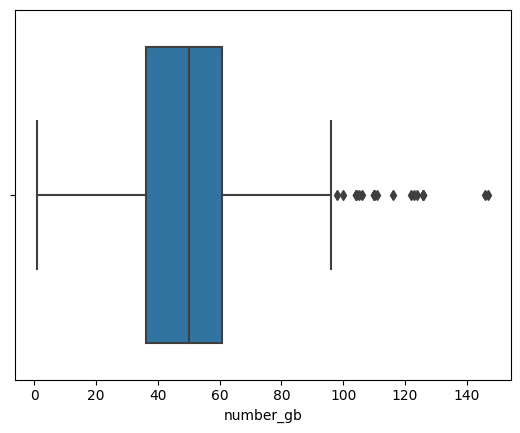

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de gb
import seaborn as sns

sns.boxplot(internet_ultimate)

<AxesSubplot:xlabel='number_gb'>

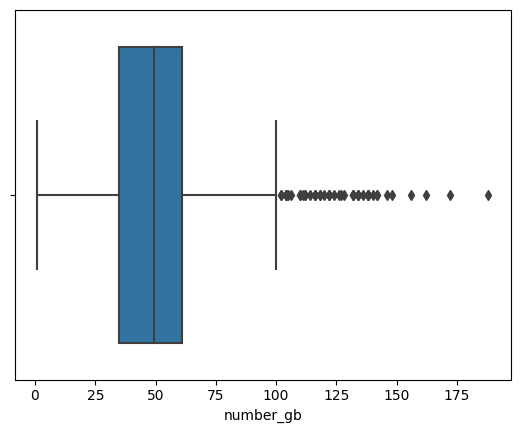

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de gb
import seaborn as sns

sns.boxplot(internet_surf)

Los usuarios del plan ultimate cerca del 25% no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 36 y 60 gb. Más de los 30  que incluye su plan.

Los usuarios del plan surf poco menos del 25% no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre 35 y 61 gb. Más de los 15 que incluye su plan.

Por lo tanto comparando ambos planes los usuarios del plan ultimate ocupa más gb que los usuarios del plan surf.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Muy buen análisis de mensajes e Internet! Has utilizado gráficos adecuados y cálculos estadísticos clave para comparar el consumo entre los planes. La observación de que los usuarios del plan **Ultimate** usan más mensajes y datos en promedio que los del plan **Surf**, y que los usuarios de este último tienden a exceder su límite de datos, es un hallazgo valioso para la estrategia de la empresa.  
</div>

## Ingreso

In [ ]:
total_income_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate']['total_income'].sum()
total_income_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf']['total_income'].sum()

print(income_ultimate, income_surf)
print()
print(total_income_ultimate, 'Total de ingresos plan ultimate')
print()
print(total_income_surf, 'Total de ingresos plan surf')

year_month
2018-01      210.0
2018-02      431.0
2018-03      667.0
2018-04     1323.0
2018-05     1834.0
2018-06     3136.0
2018-07     4135.0
2018-08     5091.0
2018-09     6074.0
2018-10     7712.0
2018-11     9042.0
2018-12    11454.0
Freq: M, Name: total_income, dtype: float64 year_month
2018-01       27.0
2018-02      186.0
2018-03      661.0
2018-04     1489.0
2018-05     2816.0
2018-06     3826.0
2018-07     5047.0
2018-08     7018.0
2018-09     8552.0
2018-10    11446.0
2018-11    12908.0
2018-12    16780.0
Freq: M, Name: total_income, dtype: float64

51109.0 Total de ingresos plan ultimate

70756.0 Total de ingresos plan surf


Se observa que el total de ingresos de la muestra es de $121,865.0 aportando el plan ultimate un 41.94% de los ingresos totales, mientras el plan surf un 58.06%. A su vez los usuarios del plan surf tienden a sobrepasar el límite de su plan.

Otra variable a considerar es el volumen del total que representan los usuarios de cada plan, el plan surf representa el 67.8% de la muestra mientras que el plan ultimate representa el 32.2%.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Gran análisis del ingreso total por plan! Has identificado correctamente la contribución de cada plan a los ingresos totales y resaltado que **Surf** genera más ingresos, en parte debido a los costos adicionales que enfrentan sus usuarios al exceder los límites de su plan. La observación sobre la proporción de usuarios en cada plan es clave para futuras estrategias comerciales.  
</div>

## Prueba las hipótesis estadísticas

Hipótesis nula:
 - Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales.

 Hipotesis alternativa:
 - Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.

In [ ]:
# Prueba las hipótesis
#series de total de ingresos por plan
serie_income_ultimate = df_consumption_merge[df_consumption_merge['plan'] == 'ultimate']['total_income']
serie_income_surf = df_consumption_merge[df_consumption_merge['plan'] == 'surf']['total_income']

#Promedio de las muestras
mean_income_ultimate = serie_income_ultimate.mean()
mean_income_surf = serie_income_surf.mean()
print(mean_income_ultimate, 'promedio de la muestra del plan ultimate')
print(mean_income_surf, 'promedio de la muestra del plan surf')
print()

alpha = 0.05

#Realiza la prueba
results = st.ttest_1samp(serie_income_ultimate,mean_income_surf)

#Valor p resultante
print('valor p:', results.pvalue)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

88.27115716753022 promedio de la muestra del plan ultimate
59.96271186440678 promedio de la muestra del plan surf

valor p: 2.1256153393005264e-206
Rechazamos la hipótesis nula


In [ ]:
df_consumption_area = df_consumption_merge.merge(df_users_area, on=['user_id'])
print(df_consumption_area['area'].sample(20))

1565    CA MSA
5       WA MSA
1309    AL MSA
1008    MD MSA
700     WA MSA
1457    PA MSA
997     IL MSA
1152    CA MSA
236     TX MSA
432     CT MSA
463     CA MSA
980     NH MSA
978     NH MSA
287     AR MSA
1353    WA MSA
292     CA MSA
796     IN MSA
696     TX MSA
1313    CO MSA
42      CA MSA
Name: area, dtype: object


//Me parece que no hay usuarios en el área NY-NJ//

In [ ]:
df_ml_users.loc[df_ml_users["city"] =='New York-Newark-Jersey City, NY-NJ-PA MSA']

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,area
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,1,PA MSA
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,PA MSA
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,1,PA MSA
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,1,PA MSA
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,1,PA MSA
...,...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,1,PA MSA
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,1,PA MSA
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,1,PA MSA
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,1,PA MSA


<div class="alert alert-block alert-danger">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>A resolver</b> ❗ - Buen esfuerzo en la extracción de información sobre la ubicación de los usuarios. Sin embargo, la columna **'area'** está siendo generada incorrectamente, ya que los datos realmente se encuentran en la columna **'city'**. Esto puede llevar a una segmentación inexacta y afectar el análisis posterior. Para mejorar tu enfoque, revisa cómo se extraen los datos de la columna **'city'**.  

He dejado un ejemplo de código corregido que te ayudará a ajustar esta parte y asegurar que los datos sean precisos:  

Confío en que puedes corregir este detalle y fortalecer aún más tu análisis. ¡Estás en el camino correcto, sigue explorando y mejorando!  
</div>

## Conclusión general


Respecto a los costos extras:

 - En general aquellos con el plan Ultimate registran muy pocos costos extras a comparación de los del plan Surf que en su mayoría exceden el límte de su plan.

Respecto a las llamadas:

 - Los usuarios del plan ultimate no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 39 y 87 minutos.

 - Los usuarios del plan surf no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre 41 y 84 minutos.

Respecto a los mensajes:

 - Los usuarios del plan ultimate no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 39 y 87 minutos.

 - Los usuarios del plan surf no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre 41 y 84 minutos.

Respecto a los datos:

 - Los usuarios del plan ultimate cerca del 25% no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre los 36 y 60 gb. Más de los 30  que incluye su plan.

 - Los usuarios del plan surf poco menos del 25% no sobrepasan el límite de su plan y el 50% de la muestra ocupa entre 35 y 61 gb. Más de los 15 que incluye su plan.

 - Por lo tanto comparando ambos planes los usuarios del plan ultimate ocupa más gb que los usuarios del plan surf.

 - Ambos planes ofrecen menos datos de lo que el promedio de usuarios requiere.

Respecto a los ingresos:

 - Se observa que el total de ingresos de la muestra es de $121,865.0 aportando el plan ultimate un 41.94% de los ingresos totales, mientras el plan surf un 58.06%. A su vez los usuarios del plan surf tienden a sobrepasar el límite de su plan.

 - Otra variable a considerar es el volumen del total que representan los usuarios de cada plan, el plan surf representa el 67.8% de la muestra mientras que el plan ultimate representa el 32.2%.

Respecto a las hipótesis:

 - Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes. Siendo el plan ultimate el plan que más ingresos tiene por usuario.

# Comentario general del revisor 1a iteración


<div class="alert alert-block alert-danger">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
¡Has realizado un gran trabajo en este proyecto! Se nota el esfuerzo y la dedicación en la limpieza de datos, el análisis comparativo entre planes y la correcta aplicación de herramientas estadísticas para extraer conclusiones. Además, el uso de visualizaciones ha sido efectivo para respaldar los hallazgos.  

Sin embargo, hay un error importante en la extracción de la columna **'area'**, ya que los datos se están buscando en la columna incorrecta (**'city'**). Esto puede afectar el análisis y las conclusiones relacionadas con la ubicación de los usuarios. Para que el proyecto pueda ser aprobado, es necesario corregir esta parte y verificar que los datos extraídos sean precisos. He dejado una sugerencia de código para ayudarte con la corrección.  

Una vez que realices este ajuste, el proyecto estará en condiciones de ser aprobado. ¡Confío en tu capacidad para resolverlo y mejorar aún más este excelente trabajo! Sigue adelante, cada error corregido es un paso más en tu aprendizaje y crecimiento como analista.  
